In [1]:
# import libraries and tools
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import seaborn as sns

from dateutil.parser import parse
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# suppress warnings
import warnings;
warnings.filterwarnings('ignore');

# Part 1 - Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
# Open 'logins.json': logins
with open('/Users/ryneschultz/OneDrive/Data Science Career Track/Take-Home Challenges/ultimate_challenge/logins.json') as logins_file:
    logins=json.load(logins_file)

# Select sorted'login_time' list from 'logins': logins
logins = sorted(logins['login_time'])

# Convert 'dates' from string to datetime.datetime: logins
logins = [parse(login) for login in logins]

# Convert logins to a DataFrame
df_logins = pd.DataFrame(logins, columns=['login_time'])

# Print the first 5 entries
df_logins.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [3]:
df_logins.describe()

,login_time
count,93142
unique,92265
top,1970-04-04 01:17:40
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [4]:
# Set the df_logins index equal to 'login_time'
df_logins.set_index('login_time', drop=False, inplace=True)

# Rename 'login_time' to 'Frequency'
df_logins.columns = ['Frequency']

# Group the index values into 15 minute increments and plot the counts using a bar graph
df_frequency = df_logins.groupby(pd.Grouper(freq='15Min')).count()

df_frequency.head()

,Frequency
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [5]:
df_frequency.describe()

,Frequency
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [6]:
df_frequency.reset_index(level=0, inplace=True)

df_frequency['login_time'] = df_frequency['login_time'].apply(lambda x : pd.to_datetime(str(x)))

df_frequency.head()

,login_time,Frequency
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


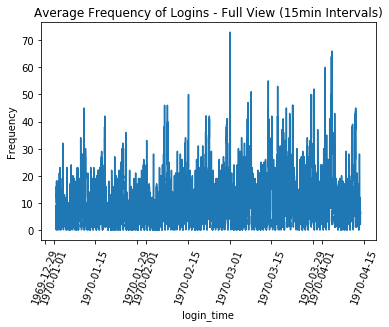

In [7]:
# Plot df_frequency as a line graph
#df_frequency.plot(kind='line')
sns.lineplot(x='login_time', y='Frequency', data=df_frequency)

# Give the graph a title
plt.title('Average Frequency of Logins - Full View (15min Intervals)')

# Set the xticks rotation to 70 degrees
plt.xticks(rotation=70)

# Show the graph
plt.show()

When we look at the full view of all the average logins across 15 minute intervals we see some definite trends:
   
    1. There appears to be a cycle that occurs with some regularity whereby at the beginning of the cycle the frequency of logins are relatively low but increase to a peak between 40 and 50 per 15 minute interval.
    
    2. In general, it appears that this cycle tracks across a weekly time frame. We see roughly 15 of these cycles in the data, which roughly covers 3.5 months. Assuming 4 weeks a in a month, that comes out to ahout 14 weeks, which tracks closely with the 15 cycles we observe.

In [8]:
df_frequency.reset_index(level=0, inplace=True)

df_frequency['login_time'] = df_frequency['login_time'].apply(lambda x : pd.to_datetime(str(x)))

df_frequency.head()

,index,login_time,Frequency
0,0,1970-01-01 20:00:00,2
1,1,1970-01-01 20:15:00,6
2,2,1970-01-01 20:30:00,9
3,3,1970-01-01 20:45:00,7
4,4,1970-01-01 21:00:00,1


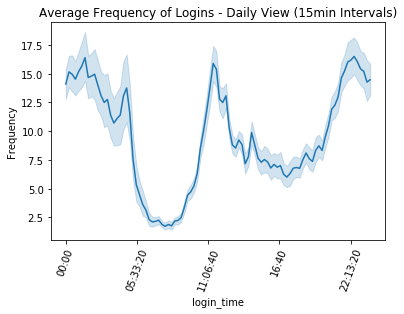

In [9]:
# Set df_day equal to df_frequency
df_day = df_frequency.copy()

# Exract time from 'login_time': df_day
df_day['login_time'] = df_day['login_time'].dt.time

# Create a Seaborn barplot showing the login frequency across a typical day
sns.lineplot(x='login_time', y='Frequency', data=df_day)

# Give the graph a title
plt.title('Average Frequency of Logins - Daily View (15min Intervals)')

# Set the xticks rotation to 70 degrees
plt.xticks(rotation=70)

# Show the graph
plt.show()

When we look at average daily logins we some definite trends:

    1. There appear to be two peaks and two troughs throughout the day. The first peak occurs from roughly 9pm until 1am, before falling to the first trough around 9am; here the trend reverses itself and peaks out again around 12pm before falling again, hitting the second trough around 5:00pm; finally, login frequency picks up again after 5:00pm until around 9pm.
    
    2. This cycle appears to track well with the typical working day: peak working hours (9:00am to 12:00pm and 1:00pm to 5:00pm) correlate almost perfectly with the troughs signaling that users are working and unable to login, but once the work day ends logins rise.

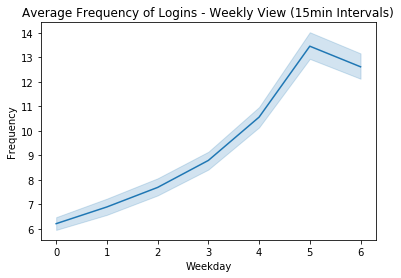

In [10]:
df_week = df_frequency.copy()

df_week['login_time'] = df_week['login_time'].dt.weekday

sns.lineplot(x='login_time', y='Frequency', data=df_week)

# Give the graph a title
plt.title('Average Frequency of Logins - Weekly View (15min Intervals)')

plt.xlabel('Weekday')

# Show the graph
plt.show()

When we look at average weekly login trends we can confirm the intuition we first laid out when we analyzed the full view trends, namely that login frequency increases throughout the week, peaking on Saturday (Monday is 0 and Sunday is 6).

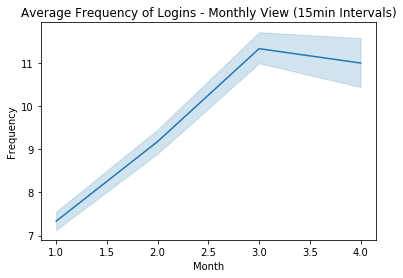

In [11]:
df_month = df_frequency.copy()

df_month['login_time'] = df_month['login_time'].dt.month

sns.lineplot(x='login_time', y='Frequency', data=df_month)

# Give the graph a title
plt.title('Average Frequency of Logins - Monthly View (15min Intervals)')

plt.xlabel('Month')

# Show the graph
plt.show()

When we look at average monthly login trends we see month over month increases in average logins. April (month 4) is almost at March's highs even though the data only goes through the 13th day of the month. Therefore, we can expect that April will surpass March in average logins. The overall trend points to strong month over month growth in average user logins, signaling strong growth of the platform.

# Part 2 - Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

**1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?**

The key measure of success would be the percentage change in the number of rides provided in *both* cities.

**2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:**

    a. how you will implement the experiment
    
    Before the implementation of the program we would expect to see a definite skew in the number of rides in each city - with the majority of rides occuring in one city and not the other. We could create a new field that sets each observation equal to 0 *before* implementation the program and equal to 1 after implementation of the program. We could then analyze ride data before and after the program to see if there is any change in partner behavior
    
    b. what statistical test(s) you will conduct to verify the significance of the observation
    
    I would implement an A/B test whereby I would analyze partner ride data before implementation of the program and partner ride data after implementation. If there is a statistically significant percentage rise in the number of rides in *both* cities after the program is implemented we can be fairly sure that the program is leading to the desired outcome.
    
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
    
    If there is a statistically significant percentage rise in the number of rides in both cities after the program is implemented we can be fairly sure that the program is leading to the desired outcome and we can recommend continuing the program (so long as the costs of the program do not outweigh the benefits). If, however, we do not see a statistically significant percentage rise in the number of rides in both cities after the program is implemented we can be fairly sure that the program is not having the desired effect and therefore does not justify its costs. In such a case we would likely recommend ending the program.

# Part 3 - Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

    The fraction of observed users that were ratained was 36.62%.
    

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

    I chose a Random Forest Classifier model. Alternatively, I could have used a logistic regression model, a naive bayes classifier, a support vector machine, or even a neural network. I chose a Random Forest Classifier model because its impressive versatility: it can handle binary features, categorical features, and numerical features. Additionally, there is very little pre-processing that needs to be done when using a Random Forest model, nor does the data need to be rescaled or transformed.
    
    Additionally, Random Forest is great with with higher dimensionality, robust to uutliers and non-linear data, and handles unbalanced data well. Thogh each individual decision tree has a high variance, and low bias, because we average all the trees in random forest, we are averaging the variance as well so that we have a low bias and moderate variance model.
    
    But perhaps most importantly, the out-of-bag performance for a Random Forest is very similar to cross validation, meaning that as we increase the number of estimators in the model, the model converges with it's cross-validated scores. In a sense, then, we get cross-validation for free when we have a large number of estimators (like 10,000, as I do in my model) - though this is at the expense of model running time.
  
    One concern I do have in using Random Forest is that Random forest models are not all that interpretable; they are like black boxes. Therefore we have to some post modeling analysis to accurately interpret the finding of the model (e.g. feature importance analysis)
    
    When we run the model we find that it is 76.5% accurate in predicting retention. We should compare this to a naive model that would have simply guessed that all users would not be retained, which would have attained an accuracy score of 48.2%. Clearly, our model makes a huge improvment on this naive model.
    

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

    After running the model I pulled the model's feature importances. It appears that, by far, the most important feature is the average distance in miles per trip taken in the first 30 days after signup. This suggests that perhaps Ultimate should provide a discount on longer trips during the first 30 days.
    
    Additionally, it appears that the second most important feature is the percent of the user’s trips occurring during a weekday. This makes intuitive sense, as users that rely on Ultimate for their commute are more likely to be retained. Perhaps Ultimate should provide some sort of bulk purchase or subscription option for weekday commuters: commuters would pay a monthly subscription instead of a per-ride fee. This could be a good deal for regular users - like commuters - who use the service and may improve retention.

In [12]:
# Open 'ultimate_data_challenge.json': data
with open('/Users/ryneschultz/OneDrive/Data Science Career Track/Take-Home Challenges/ultimate_challenge/ultimate_data_challenge.json') as json_file:
    data=json.load(json_file)
    
df_data = pd.DataFrame.from_dict(data, orient='columns')

# Print the first 5 entries
df_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [13]:
df_data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [14]:
# Seperate out 'last_trip_date' into a new variable: last_trip_dates
last_trip_dates = df_data['last_trip_date']

# Convert last_trip_dates from string to datetime
last_trip_dates = [parse(date) for date in last_trip_dates]

# Determine the maximum last trip date to determine when the data was pulled: max_last_trip_date
max_last_trip_date = max(last_trip_dates)
print('Data Pull Date: ', max_last_trip_date)

# Determine the difference between the max_last_trip_date and each of the dates in last_trip_dates: date_diff
date_diff = [(max_last_trip_date - date) for date in last_trip_dates]

# Create a new feature in df_date that is set to 1 if the timedelta in date_diff is less than 30, else 0: 'retained'
df_data['retained'] = [int(date < dt.timedelta(days=30)) for date in date_diff]

Data Pull Date:  2014-07-01 00:00:00


In [15]:
# Print the fracton of observed users that were retained
print('Fraction of Observed Users Retained: ', len(df_data[df_data['retained'] == 1])/len(df_data))

Fraction of Observed Users Retained:  0.3662


In [16]:
# Convert 'city', 'phone', and 'ultimate_black_user' to dummy variables using one-hot encoding
df_data = pd.get_dummies(df_data, columns=['city', 'phone'])

# Convert 'ultimate_black_user' to int from boolean
ultimate_black_user = df_data['ultimate_black_user']
ultimate_black_user = [int(x == True) for x in ultimate_black_user]
df_data['ultimate_black_user'] = ultimate_black_user

# Impute missing values with the mean value
df_data.fillna(df_data.mean(), inplace=True)

# Drop any remaining missing values
df_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

# Look at the new created features
df_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,1,46.2,1,0,1,0,0,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,0,50.0,0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,0,100.0,0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,1,80.0,1,0,1,0,0,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,0,82.4,0,0,0,1,1,0


In [17]:
# Describe df_data
df_data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,0.37708,60.926084,0.36620,0.330680,0.202600,0.466720,0.300440,0.691640
std,5.707357,0.445753,0.564977,0.222336,19.958811,3.792684,0.48466,37.081503,0.48177,0.470463,0.401941,0.498896,0.458454,0.461821
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,0.00000,33.300000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,0.00000,66.700000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,1.00000,100.000000,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.00000,100.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# Create variables X and y from the dataset
X = df_data.drop(columns=['last_trip_date', 'signup_date', 'retained'])
y = df_data['retained']

# Split data into test/train set (70/30 split) and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Set an instance of RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10000, oob_score=True, n_jobs=-1, random_state=23, warm_start=True)

# Fit the model to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=True, random_state=23, verbose=0, warm_start=True)

In [19]:
# Predict y values using the model
y_pred = rfc.predict(X_test)

# Convert y_test to DataFrame
y_test = pd.DataFrame(y_test)

# Reset the index
y_test = y_test.reset_index()

# Drop new 'index' column
y_test = y_test.drop(columns=['index'])

# Combine y_test and y_pred into a single DataFrame
y_test['predicted'] = y_pred

# Determine accuracy: accuracy
accuracy = len(y_test[y_test['retained'] == y_test['predicted']])/len(y_test)
print('Naive Model Accuracy: ', accuracy)

# Validate the model using 5-fold cross-validation
print('Mean Cross-Val Score: ', cross_val_score(rfc, X, y, cv=5).mean())

Model Accuracy:  0.7650666666666667
Mean Cross-Val Score:  0.7627


In [20]:
# determine the most important features
feature_imp = pd.DataFrame(rfc.feature_importances_,
                           index = X_train.columns,
                           columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
avg_dist,0.290580
weekday_pct,0.129416
avg_rating_by_driver,0.116786
avg_rating_of_driver,0.081700
surge_pct,0.080951
trips_in_first_30_days,0.080199
avg_surge,0.066594
city_King's Landing,0.050698
ultimate_black_user,0.033383
phone_Android,0.022378


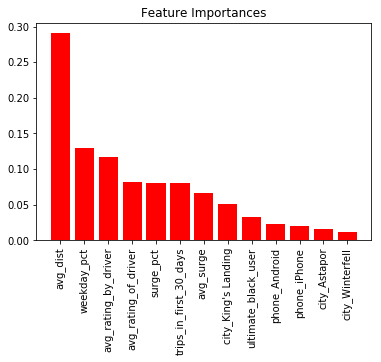

In [21]:
# plot feature importance
plt.figure()
plt.bar(range(X.shape[1]), feature_imp.values.reshape(1,13)[0],
       color="r", align="center")
plt.title("Feature Importances")
plt.xticks(range(X.shape[1]), feature_imp.index.values, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()